# This demo shows how the data is clustered in the X direction, in order to automatically construct the membership function centroids. 

### Example 1 handles the elec benchmark data
### Example 2 handles the gas consumption data

In [8]:
import numpy as np
import csv
import os
import sys
import matplotlib.pyplot as plt

# add path of needed code
parent_directory = os.path.abspath('..')
sys.path.append(parent_directory+'/Code/')


from Fuzzification import cluster, scale
import FIS

%matplotlib inline

In [16]:
def read_elec_data(path, file):
    '''
    Reads in the data and returns it
    as a float type numpy array
    '''
    data_train= []
    with open(path+file) as file:
        reader = file.readlines()
        for row in reader:
            row = row.split()
            data_train.append([float(x) for x in row])
    return np.array(data_train)

def read_gas_data(path, file):
    '''
    Reads in the gas data and returns it
    as a float type numpy array.
    Formats are in csv and the first two
    columns (row ID and date) are removed
    '''
    data_train= []
    with open(path+file+'.csv') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            try:
                data_train.append([float(x) for x in row[2:]])
            except: 
                header = row
                print(header[2:])
                ValueError
    return np.array(data_train)

## Example 1: Using the benchmark data, using 5 clusters for each feature
http://decsai.ugr.es/~casillas/fmlib/ele2-4-1056.html

In [7]:
path = 'Data/elec/'
file = 'ele2-4-1056-1.tra'
data = read_elec_data(path, file)

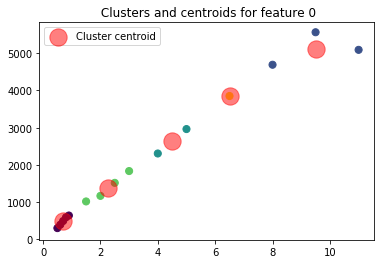

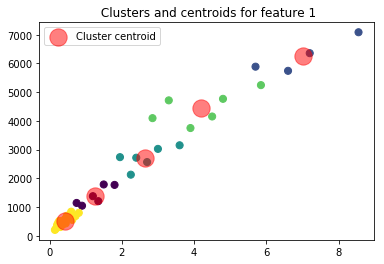

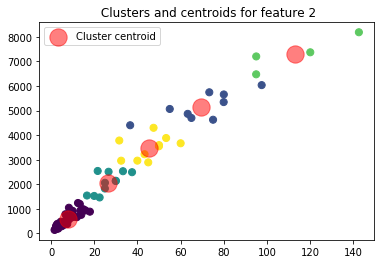

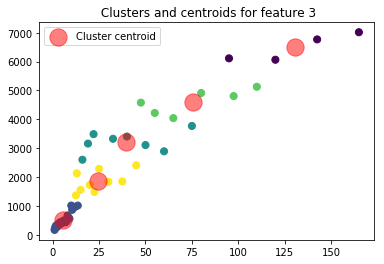

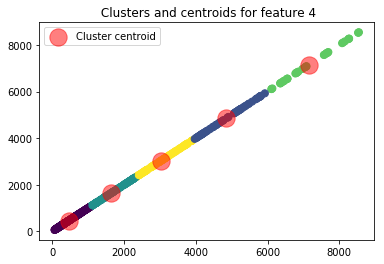

In [9]:
# The target column of your data
target_col = -1 # last column
# number of clusters per feature
Ncentroids = 5
centroids = cluster(data, target_col, Ncentroids, plot=True)

## Example 2: Using the gas consumption data

In [17]:
path = 'Data/gas/'
file = 'train1'
data = read_gas_data(path, file)

['gas', 'before1', 'before2', 'peak5', 'sum5', 'peak24', 'sum24', 'mean15', 'hour', 'FH', 'T', 'Q', 'U', 'peak5T', 'diffT', 'std_day', 'std_year', 'kwh', 'kwhpeak5', 'day_year', 'day_week', 'next_day_week']


In [21]:
# The hand picked amount of clusters for each feature specific
# As you can see, de header contains 22 features, hence, you need
# to specify 22 centroid counts in the following list:
Ncentroids = [9,9,5,5,9,7,9,9,9,9,9,9,9,9,9,9,9,5,5,9,7,7]
# for this data set, the target column is de first column
target_col = 0

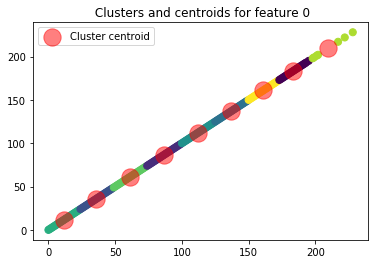

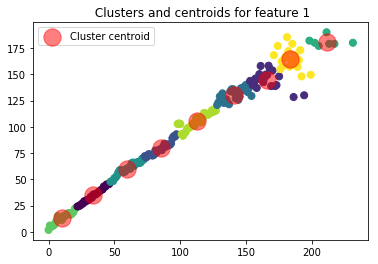

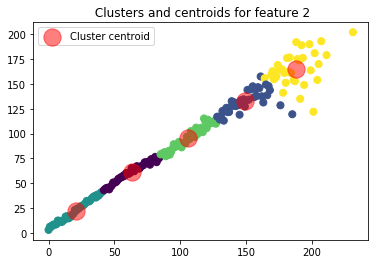

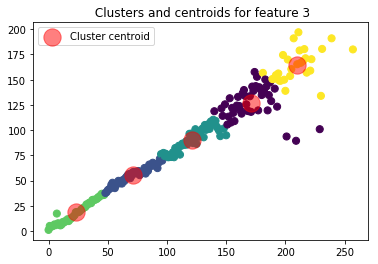

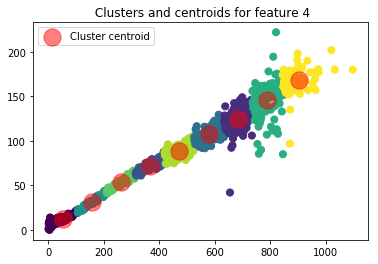

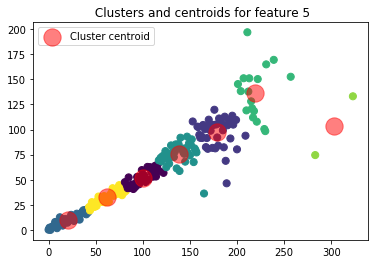

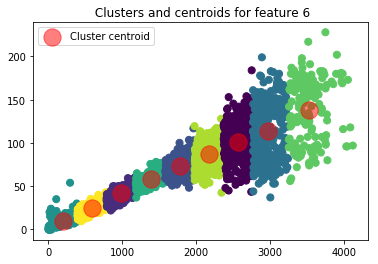

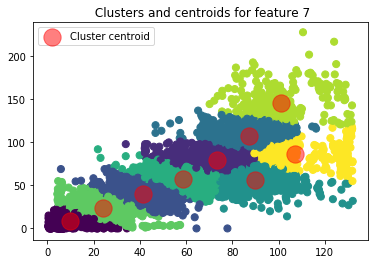

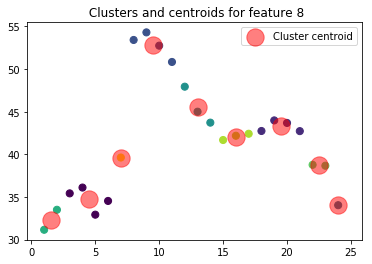

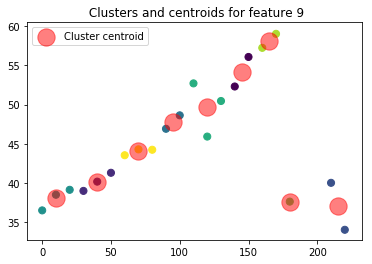

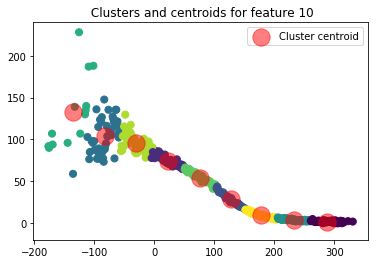

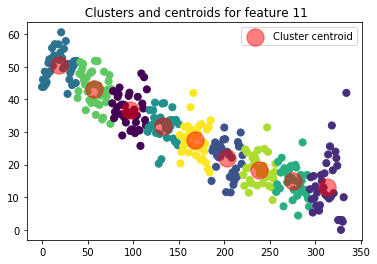

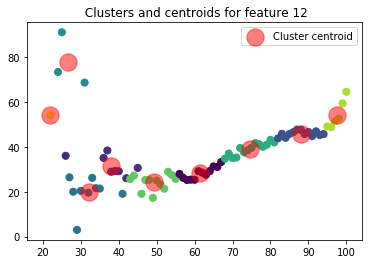

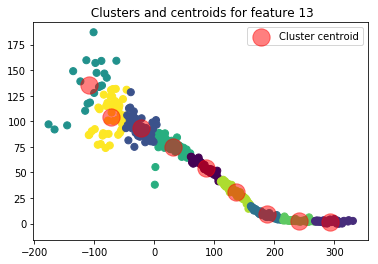

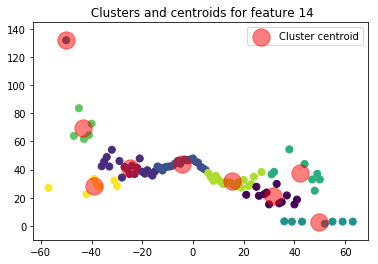

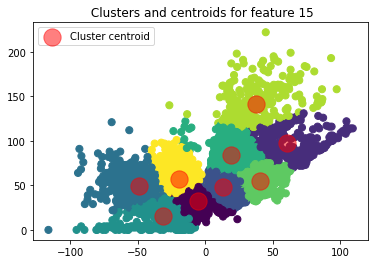

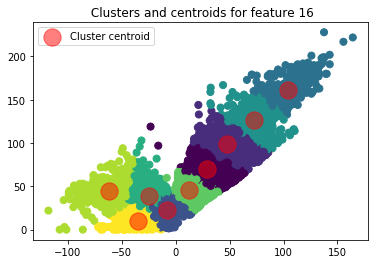

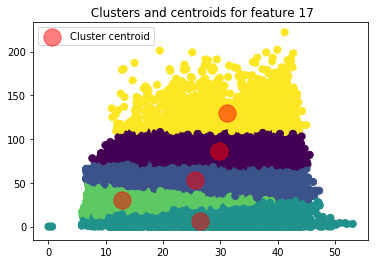

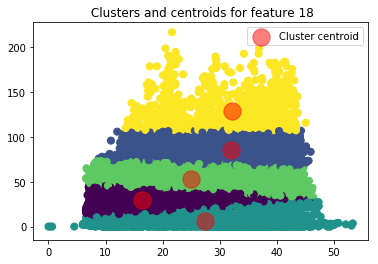

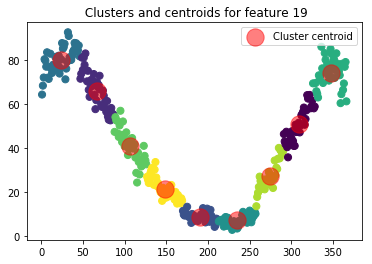

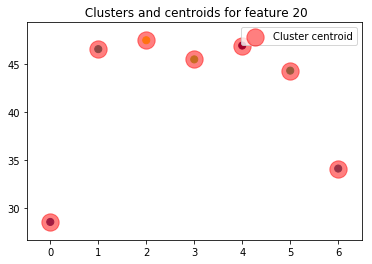

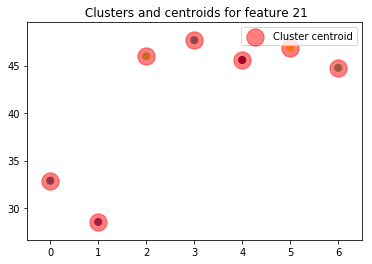

In [22]:
Ncentroids = cluster(data, target_col, Ncentroids, plot=True)